In [1]:
# Import Data
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
df1 = pd.read_csv('./Data/DT_Jan16_XT.csv')
df2 = pd.read_csv('./Data/DT_Jan16_YT.csv')
# Split Data - Train & Test
del df2['Unnamed: 0']
del df2['Date']
print(df2.columns.values)
n_train = 8000
X = df1.values
Y = df2.values
Y1 = df2['Appm(bttm)'].values
Y2 = df2['Bppm(top)'].values

['Appm(bttm)' 'Bppm(top)']


In [2]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X[:8900])
Y = scaler.fit_transform(Y[:8900])
#train_X, train_y = train[:, :-1], train[:, -1]
n_train = 8000
train_X = X[:n_train, :]
test_X = X[n_train:,:]
train_Y = Y[:n_train,1]
test_Y = Y[n_train:,1]

In [3]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()

In [7]:
from sklearn import metrics
linreg.fit(train_X,train_Y)
print(metrics.r2_score(train_Y,linreg.predict(train_X)))
print(metrics.mean_squared_error(train_Y,linreg.predict(train_X)))
print(metrics.mean_squared_error(test_Y,linreg.predict(test_X)))

0.836897908517
0.000927460064074
0.000304455298754


In [7]:
metrics.r2_score(test_Y,linreg.predict(test_X))

0.85445186195177592

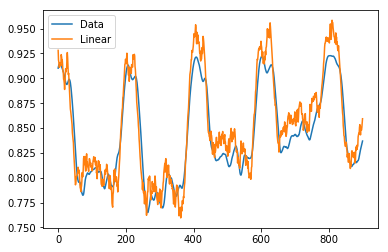

In [8]:
from matplotlib import pyplot
y_pred = linreg.predict(test_X)
pyplot.plot(test_Y, label='Data')
pyplot.plot(y_pred, label='Linear')
pyplot.legend()
pyplot.show()